# Different approaches of KPI

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cash_request = pd.read_parquet("cleaned_requests.parquet", engine="pyarrow")
fees = pd.read_parquet("cleaned_fees.parquet", engine="pyarrow")


status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64

## Approval vs. Rejection Rate
Conlusions:
- Knowing that 3/4 of the time the status are approved but there is still a 1/4 of them that the solicitude is rejected. 
- 1/4 of all the movement is rejected and this is a big chunk to take into consideration and find why it happens

In [35]:
cash_request['status'].value_counts()


status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64

In [36]:
moneyback_rate = (cash_request[cash_request['status'] == 'money_back'].shape[0] / len(cash_request)) * 100
rejection_rate = (cash_request[cash_request['status'] == 'rejected'].shape[0] / len(cash_request)) * 100
direct_debit_rejected_rate = (cash_request[cash_request['status'] == 'direct_debit_rejected'].shape[0] / len(cash_request)) * 100
active_rate = (cash_request[cash_request['status'] == 'active'].shape[0] / len(cash_request)) * 100
transaction_declined_rate = (cash_request[cash_request['status'] == 'transaction_declined'].shape[0] / len(cash_request)) * 100
direct_debit_sent_rate = (cash_request[cash_request['status'] == 'direct_debit_sent'].shape[0] / len(cash_request)) * 100
cancelled_rate = (cash_request[cash_request['status'] == 'canceled'].shape[0] / len(cash_request)) * 100

print("Money Back Rate (%):", moneyback_rate)
print("Rejection Rate (%):", rejection_rate)
print("Direct Debit Rejected Rate (%):", direct_debit_rejected_rate)
print("Active Rate (%):", active_rate)
print("Transaction Declined Rate (%):", transaction_declined_rate)
print("Direct Debit Sent Rate (%):", direct_debit_sent_rate)
print("Cancelled Rate (%):", cancelled_rate)
print("Total Rate (%):",moneyback_rate+rejection_rate+direct_debit_rejected_rate+active_rate+transaction_declined_rate+direct_debit_sent_rate+direct_debit_sent_rate+cancelled_rate)

Money Back Rate (%): 68.40634125990822
Rejection Rate (%): 27.400917813934083
Direct Debit Rejected Rate (%): 3.466833541927409
Active Rate (%): 0.2461410095953275
Transaction Declined Rate (%): 0.2002503128911139
Direct Debit Sent Rate (%): 0.14184397163120568
Cancelled Rate (%): 0.1376720901126408
Total Rate (%): 100.14184397163122


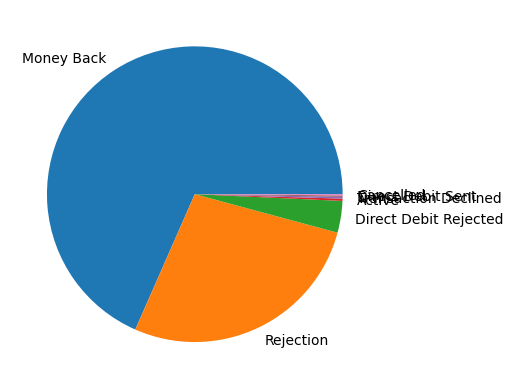

In [ ]:
labels_low = ['Money Back', 'Rejection', 'Direct Debit Rejected', 'Active', 'Transaction Declined', 'Direct Debit Sent', 'Cancelled']
values_low = [moneyback_rate, rejection_rate, direct_debit_rejected_rate, active_rate, transaction_declined_rate,direct_debit_sent_rate,cancelled_rate]

plt.pie(values_low, labels=labels_low)
plt.show()

In [37]:
# Join by approval or similar
approval_total_rate = moneyback_rate + active_rate + direct_debit_sent_rate

# Join by canceled or similar
rejection_total_rate = rejection_rate + direct_debit_rejected_rate + transaction_declined_rate + cancelled_rate

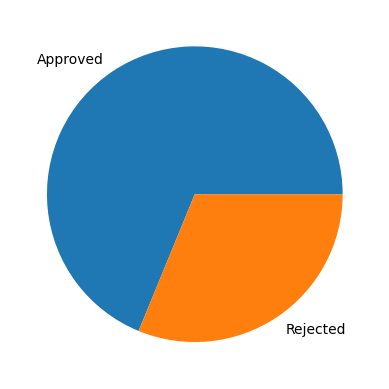

In [41]:
labels = ['Approved', 'Rejected']
values = [approval_total_rate, rejection_total_rate]

plt.pie(values, labels=labels)
plt.show()

## Approval vs. Rejection Rate